In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import pre_utils
import cv2
import os
import shutil
from PIL import Image
import numpy as np

folder='../../my_data/UCF-Brox/flow/jpg/'
outputfolder='../../my_data/UCF-Brox/flow/key_jpg/'

In [2]:
def histImage(image):
    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = 7)
    clt.fit(image)
    
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    
    hist = pre_utils.centroid_histogram(clt)
    #print("hist", hist)
    #print("clt.cluster_centers_",clt.cluster_centers_)
    bar = pre_utils.plot_colors(hist, clt.cluster_centers_)
    
    return bar 
    

In [3]:
def compareHSV(bar0, bar1, a_margin=0, nc_margin=0, m_margin=0):
    newColor=[]
    for b in bar1:
        
        flag=False
        for bb in bar0:
            if (abs(b[1]-bb[1])<=a_margin) and (abs((b[2]*b[3])-(bb[2]*bb[3]))<=m_margin):
                flag=True       
                
        if flag==False:#new color not in range of any exiting color
            if b[0] > nc_margin  or (b[2]*b[3]) > m_margin:
                newColor.append(b)
            
    
    for b in bar0:
        flag1=False
        for bb in bar1:
            if (abs(b[1]-bb[1])<=a_margin) and (abs((b[2]*b[3])-(bb[2]*bb[3]))<=m_margin):
                flag1=True       
                
        if flag1==False:#new color not in range of any exiting color
            if b[0] > nc_margin or (b[2]*b[3]) > m_margin:
                newColor.append(b)
    return newColor

In [4]:
def excludeBK(bar):
    foregroundBar=[]
    
    for b in bar:
        foregroundBar.append((b[0],b[1],b[2],b[3]))
    #return foregroundBar
    sorted_list = sorted(foregroundBar,key=lambda t: (t[2]*t[3]))
    #print(sorted_list)
    if sorted_list[0][0]>0.5:
        sorted_list.pop(0)
    
    return sorted_list

In [6]:
image = cv2.imread("v_WallPushups_g01_c01_26.jpg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#down Sample
#image= cv2.pyrDown(image)
             
bar=histImage(image)
#print(bar.shape)
'''plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()'''

image1 = cv2.imread("v_WallPushups_g01_c01_37.jpg") 
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) 
#down Sample
#image= cv2.pyrDown(image)
             
bar1=histImage(image1)
#print(bar1.shape)
'''plt.figure()
plt.axis("off")
plt.imshow(bar1)
plt.show()'''

bar=excludeBK(bar) 
bar1=excludeBK(bar1)

if len(compareHSV(bar, bar1,15,0.2,0.2)) > 1:
        print(len(compareHSV(bar, bar1,15,0.2,0.2)))

diff=compareHSV(bar, bar1,15,0.2,0.2)
print(diff)


his=[]
cls=[]
for i in diff:
    #print(i)
    his.append(i[0])
    clr_list=[]
    clr_list.append(i[1])
    clr_list.append(i[2])
    clr_list.append(i[3])
    cls.append(np.array(clr_list))
#print(np.array(his))
#print(np.array(cls))
bz=pre_utils.plot_diffs(his, cls)
#print(bz)
plt.figure()
plt.axis("off")
plt.imshow(bz)
plt.show()

6
[(0.040651041666666665, 11, 0.2285084079713712, 0.9976133411336944), (0.023697916666666666, 13, 0.43259423311502376, 0.9968071230691286), (0.038984375, 356, 0.21434456441610972, 0.9971148365794693), (0.0396484375, 275, 0.3191021913119113, 0.9947699539585979), (0.07234375, 344, 0.5512002075483571, 0.9957481048574931), (0.025052083333333332, 289, 0.5861353458319617, 0.9744384656149383)]


AttributeError: 'list' object has no attribute 'astype'

(0.7114192708333333, 329, 0.009084691536406812, 0.9969750442044042)
(0.07235677083333333, 344, 0.5511160405807806, 0.9957516927951667)
(0.025065104166666668, 289, 0.5861231914359757, 0.9743417366946799)
(0.03494791666666667, 1, 0.6751313394936769, 0.9931430992665319)
(0.039635416666666666, 275, 0.31920601205988547, 0.9947647961222651)
(0.039153645833333334, 356, 0.21385017421602384, 0.9971087071343332)
(0.077421875, 323, 0.08380356747843125, 0.983563432097788)


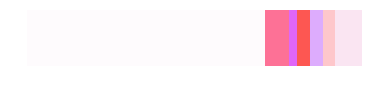

In [4]:
image = cv2.imread("v_WallPushups_g01_c01_26.jpg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#down Sample
#image= cv2.pyrDown(image)
             
bar=histImage(image)
#print(bar)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

(0.0565625, 7, 0.09929471238126675, 0.9980740278587802)
(0.051106770833333336, 3, 0.7206737974790802, 0.9946217060072434)
(0.730234375, 3, 0.02024262946032742, 0.9982169921590993)
(0.044205729166666666, 0, 0.5328039758601947, 0.9969230591470533)
(0.05354166666666667, 5, 0.8693382308607953, 0.9964913786526285)
(0.040651041666666665, 11, 0.2285084079713712, 0.9976133411336944)
(0.023697916666666666, 13, 0.43259423311502376, 0.9968071230691286)


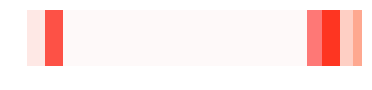

In [5]:
image = cv2.imread("v_WallPushups_g01_c01_37.jpg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#down Sample
#image= cv2.pyrDown(image)
             
bar=histImage(image)
#print(bar)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()